In [1]:
#importing neccessary libraries
import pandas as pd # data processing
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # some plotting
import seaborn as sns # Seaborn is a library for making statistical graphics in Python
from scipy import stats #for stattistical model
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier # checking if this is available
# from sklearn import cross_validation
%matplotlib inline

In [2]:
#importing working directory
os.chdir("D:/Data Science Edwisor/Project_2")
os.getcwd()

'D:\\Data Science Edwisor\\Project_2'

In [3]:
#loading dataset
df_day=pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#understanding of data
df_day.shape
#It contains (731, 16)

#Describing the data
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


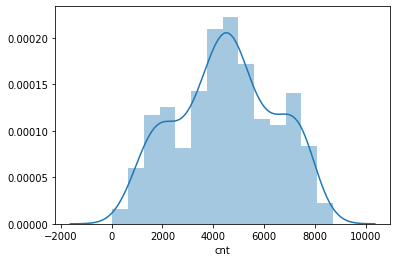

In [7]:
# Univariate Analysis
# Target variable  analysis

#descriptive of statistics summary
df_day['cnt'].describe()

#Check whether target variable is normal or not
sns.distplot(df_day['cnt']);

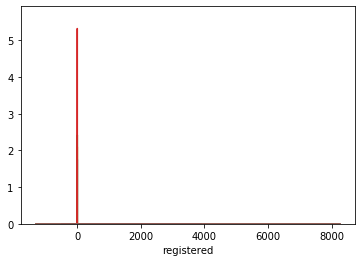

In [13]:
#Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(df_day['temp']);

#Check whether  variable 'atemp'is normal or not
sns.distplot(df_day['atemp']);

#Check whether  variable 'hum'is normal or not
sns.distplot(df_day['hum']);

#Check whether  variable 'windspeed'is normal or not
sns.distplot(df_day['windspeed']);


#Check whether  variable 'casual'is normal or not
sns.distplot(df_day['casual']);



#Check whether  variable 'registered'is normal or not
sns.distplot(df_day['registered']);


# it is clearly showing that chances of outliers present in  'casual' varible

In [15]:
#Checking skewness
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

#Here Skewness is very less so target variable  is normal distribution

Skewness: -0.047353
Kurtosis: -0.811922


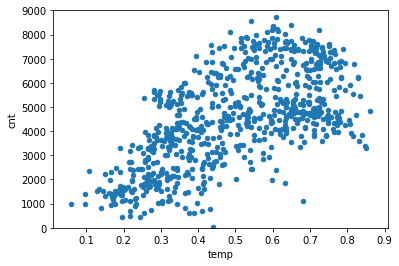

In [16]:
# Bivariate  Relationship
  

#relation between Numerical Variable 'temp' and target variable 'cnt'

df_day['temp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'temp' and 'cnt'

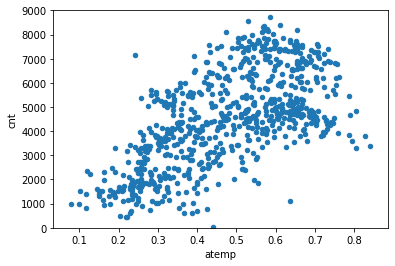

In [17]:
#relation between Numerical Variable 'atemp' and target variable 'cnt'

df_day['atemp'].value_counts()

#Now draw scatter plot between 'temp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is good relation between 'atemp' and 'cnt'

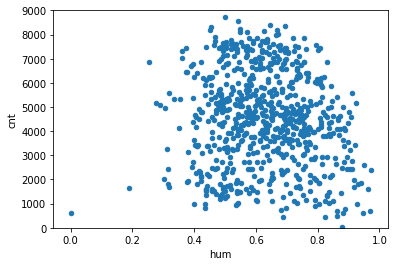

In [18]:
#relation between Numerical Variable 'hum' and target variable 'cnt'

df_day['hum'].value_counts()

#Now draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is average relation between 'atemp' and 'cnt'

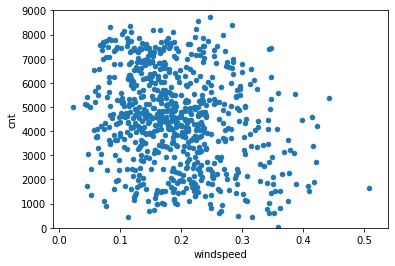

In [19]:
#relation between Numerical Variable 'windspeed' and target variable 'cnt'

df_day['windspeed'].value_counts()

#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

# It is showing  there is nagative relation between 'windspeed' and 'cnt'

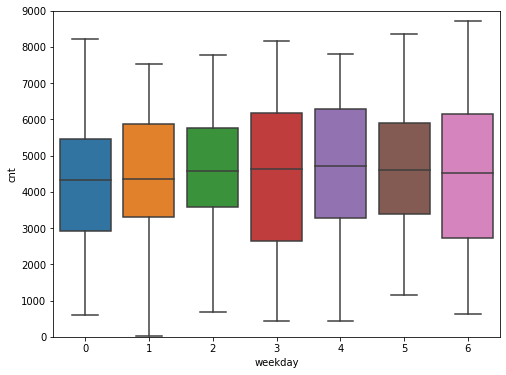

In [20]:
#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that for all the weekdays median in between 4000- 5000

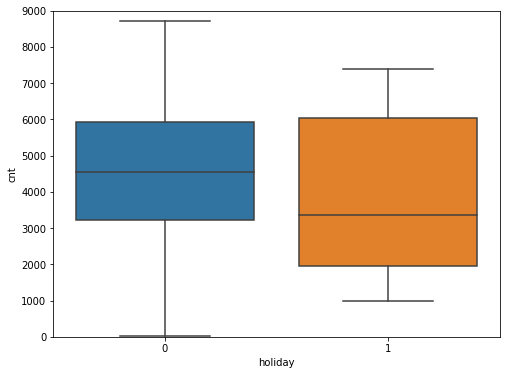

In [21]:
#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

#below Boxplot is saying that median  high on  holidays when compare to weekdays

In [24]:
#finding total missing values
total = df_day.isnull().sum().sort_values(ascending=False)
total

cnt           0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
weathersit    0
workingday    0
weekday       0
holiday       0
mnth          0
yr            0
season        0
dteday        0
instant       0
dtype: int64

In [27]:
#finding total missing values and percentage of missing data to compare the data
total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


In [28]:
#Already all numeric variable  are in normalize form so  , we are not analysing  Outliers   here

#here the  six  numerics variables are present  out of six four variables are in normalize form , 
#  temp,atem,hum,windspread  are in  normalize form  no need to check outliers

#casual and registered  have to check outliers

df_day_1 =  df_day.copy()

0.6728044333386833

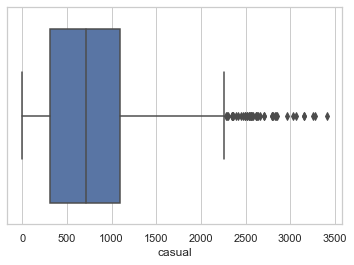

In [34]:
#Outlier Analysis

df_day.head()

#Seaborn is a library for making statistical graphics in Python
#changing background white 
sns.set(style="whitegrid")

#Orientation of the plot horizontal
ax = sns.boxplot(x=df_day['casual'],orient ='h')

#It seems Outliers are present  in  'Casual' variable  but we are keeping as it is , will detect and  conver outliers  during tuning 
#process

# Correlation before  outlier treatment

# Correlation between 'casual' and 'cnt'  before  removal of  outliers
#sns.regplot(x="casual", y="cnt", data=df_day);

df_day['casual'].corr(df_day['cnt'])

In [42]:
#determinig the 75 and 25 percntage values
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df_day.loc[:,i], [75 ,25])
    iqr = q75 - q25
q75, q25
#iqr

(1096.0, 315.5)

In [43]:
iqr

780.5

-855.25
2266.75


0.6460020508747333

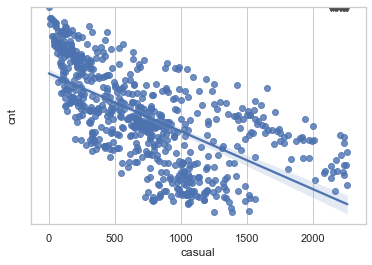

In [44]:
#calculating minimum and maximum values             
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

df_day_out = df_day.copy()

df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,i] < min].index)
df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,'casual'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day_out['casual'],orient ='h')

# Correlation between 'casual' and 'cnt'  after  removal of  outliers
sns.regplot(x="casual", y="cnt", data=df_day_out);

df_day_out['casual'].corr(df_day_out['cnt'])

In [46]:
# feature  selection
df_day.head()

#Selection of numerical feature  based  on pearson corelation 
day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]


#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important
day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.54,0.54,0.63
hum,0.13,0.14,1.0,-0.25,-0.077,-0.091,-0.1
windspeed,-0.16,-0.18,-0.25,1.0,-0.17,-0.22,-0.23
casual,0.54,0.54,-0.077,-0.17,1.0,0.4,0.67
registered,0.54,0.54,-0.091,-0.22,0.4,1.0,0.95
cnt,0.63,0.63,-0.1,-0.23,0.67,0.95,1.0


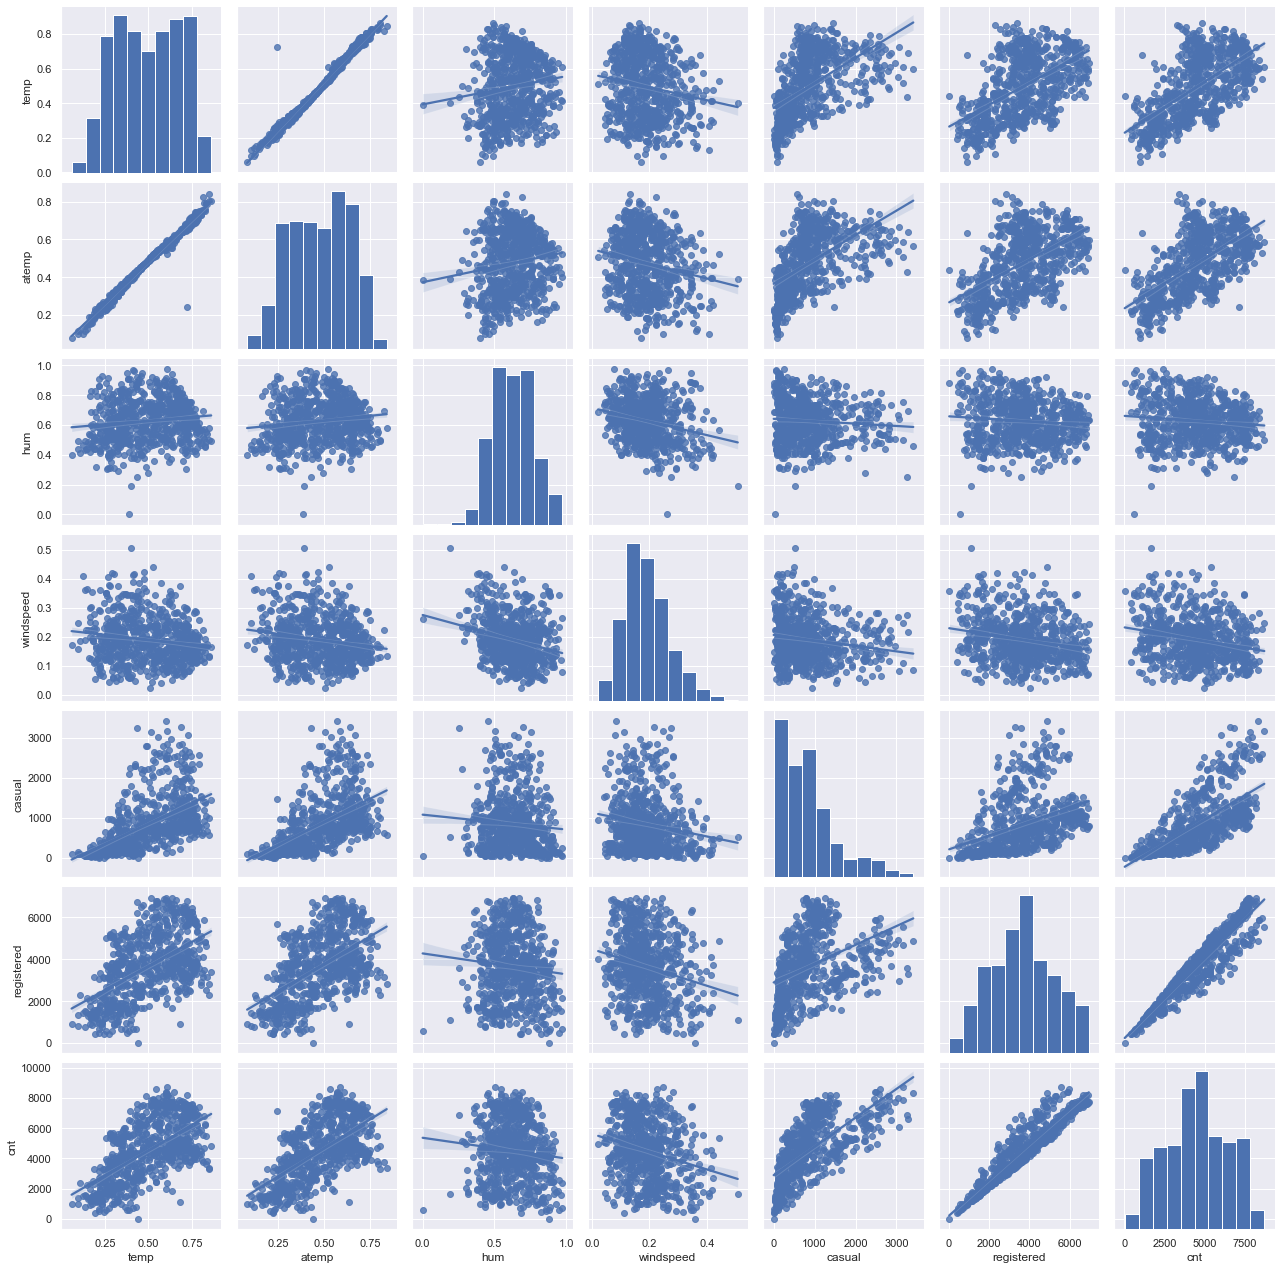

(731, 5)

In [49]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(day_numeric[cols], size = 2.5,kind="reg")
plt.show();

#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'temp' and 'atemp'
# There is a   poor relation between  Independent variable 'hum' and dependent  variable 'cnt'

# so dropping two variables for feature selection

numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

numeric_features.head()

numeric_features.shape

In [53]:
# feature  Scaling
#Normality Check

cnames = ['casual','registered']

for i in cnames:
    print(i)
    
df_day.head()

casual
registered


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [61]:
#diividing  Test and train data  using skilearn   train_test_split 

df_day_feature_selection = df_day.drop(['atemp','hum'],axis = 1)
df_day_feature_selection.shape

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_day_feature_selection, test_size=0.2)

train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
209,210,2011-07-29,3,0,7,0,5,1,1,0.838333,0.174138,670,3176,3846
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.157975,441,2787,3228
63,64,2011-03-05,1,0,3,0,6,0,2,0.384167,0.251871,640,1437,2077
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.083975,3410,4884,8294
406,407,2012-02-11,1,1,2,0,6,0,3,0.224167,0.289796,192,1977,2169


In [62]:
#Decision Tree  Regressor
#Importing Decision Tree Regressor from sklear.tree
from sklearn.tree import DecisionTreeRegressor
#Train/Test is a method to measure the accuracy of your model.
train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values
train_features_one
#target_feature

# Implement  decision tree algorithm

# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)

#Decision tree for regression
#fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,2:13], train.iloc[:,13])

#Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

# prediction   by using predict method

#predictions_DT = my_tree_one.predict(test_feature)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
[2475. 4648. 6734. 4881. 3523. 4068. 6597. 2594. 7109. 4940. 3750. 7055.
 3425. 6879. 6624. 4978.  985. 5312. 4541. 6192. 3717. 4991. 2115. 5260.
 1623. 2432. 5686. 4266. 7112. 7693. 4492.  431. 7592. 1746. 4792. 3214.
 1851. 4098. 4833. 4795. 3767. 3784. 3331. 2914. 3387. 5312. 1005. 5445.
 1600. 4780. 4905. 3005. 4748. 3846. 5259. 4326. 5345. 1495. 3784. 2739.
 5260. 6917. 1600. 3767. 7852. 6857. 4507. 5572. 4460. 4788. 1349. 4067.
 4541. 5740. 6233. 1977. 4492. 1000. 4648. 1027. 2729. 4881. 1005. 4318.
 7421. 7639. 3351. 2792. 6227. 8714. 7804. 7393. 5740. 6624. 4579. 3873.
 5323. 7592. 36

In [67]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

16.57114531476087

In [71]:
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 8
min_samples_split =4
my_tree_two = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

predictions_DT_two = my_tree_two.predict(test_feature)

print(predictions_DT_two)

MAPE(test_target_feature,predictions_DT_two)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
[2408.6        4721.38461538 6734.         4916.         3580.25
 4123.33333333 6611.33333333 2706.54545455 7110.33333333 4737.33333333
 3777.33333333 7066.66666667 3464.18181818 6887.4        6624.
 4951.4         985.         5172.         4593.375      6241.58333333
 3464.18181818 5055.25       2188.75       5172.         1658.
 2408.6        5643.16666667 4278.33333333 7314.91666667 7713.
 4447.875       468.5        7628.33333333 1722.         4721.38461538
 3017.9        1831.28571429 4120.5        4721.38461538 4951.4
 3781.375      3777.33333333 3210.46666667 3017.9        3464.18181818
 53

17.967104955283805

In [72]:
#RSS - Residual Sum 
#test_target_feature,predictions_DT_two
rss= ((test_target_feature-predictions_DT_two)**2).sum()
print(rss)

MSE = np.mean((test_target_feature-predictions_DT_two)**2)
print(MSE)

#RMSE
rmse=np.sqrt(MSE)
print(rmse)

9706904.326651443
66033.36276633634
256.96957556554503


In [73]:
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

#MAPE 
MAPE(test_target_feature,predictions_DT_two)

#RMSE
RMSE(test_target_feature,predictions_DT_two)

Mean Square :  66033.36276633634
Root Mean Square :  256.96957556554503


256.96957556554503

In [77]:
#Random Forest
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor
RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)


# Predict the model using predict funtion
RF_predict_one= RF_model_one.predict(test_feature)



In [78]:
RF_model_one

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

In [79]:
RF_predict_one

array([2386.364, 4662.086, 6488.898, 4844.558, 3691.636, 4080.496,
       6614.484, 2748.378, 6855.406, 4675.344, 3738.198, 7027.138,
       3370.528, 6860.592, 7003.96 , 4968.788,  848.104, 5481.054,
       4561.556, 6256.986, 3592.424, 4898.346, 2143.31 , 5204.014,
       1649.208, 2433.142, 5643.618, 4349.998, 7156.434, 7571.872,
       4393.064,  563.68 , 7453.614, 1925.832, 4707.806, 3288.898,
       1865.484, 4099.022, 4836.906, 4829.668, 3870.308, 3907.934,
       3562.058, 2995.074, 3295.238, 5852.554, 1021.358, 5593.566,
       1626.746, 4632.078, 4730.648, 3206.194, 4799.444, 3842.418,
       5385.362, 4420.266, 5373.988, 1396.354, 3812.34 , 2792.338,
       5575.742, 6855.668, 1631.002, 3670.354, 7794.34 , 5355.984,
       4563.472, 5499.158, 4648.718, 4382.898, 1369.268, 4209.332,
       4570.276, 5849.434, 6280.962, 2020.726, 4483.618,  998.662,
       4735.116, 1152.446, 2722.5  , 4383.984,  980.8  , 4687.52 ,
       7385.146, 7602.786, 2961.07 , 2309.284, 6000.568, 8047.

In [81]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

#Here it is stating accuracy of the model increases

19.148590089060665

In [82]:
#Evaluate  Model using  RMSE

RMSE(test_target_feature,RF_predict_one)

Mean Square :  17866.347121741488
Root Mean Square :  133.6650557241551


133.6650557241551

In [83]:
import sklearn.feature_selection as fs # feature selection library in scikit-learn


mir_result = fs.mutual_info_regression(train_features_one, train_target_feature) # mutual information regression feature ordering
mir_result


array([0.25557083, 0.25718841, 0.38860626, 0.00683441, 0.03428515,
       0.09257624, 0.36301544, 0.09328536, 0.65931167, 1.63571837])

In [85]:
#tuning  Random Forest Model
importances = list(RF_model_one.feature_importances_)
print(importances)

# List of tuples with variable and importance
#zip() can accept any type of iterable, such as files, lists, tuples, dictionaries, sets, and so on
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[0.00024706185881593, 0.000573476079246552, 0.001069700244000268, 3.517524336425037e-05, 0.0004601720050484001, 0.00016674912967011294, 0.0011687578006631318, 0.0009593753302251554, 0.09419829433127785, 0.9011212379776884]


In [86]:
train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

season = 0.2555708279361011
yr = 0.25718841458315667
mnth = 0.388606257693656
holiday = 0.006834411323241918
weekday = 0.034285147705976016
weathersit = 0.09257624422473909
temp = 0.3630154449261367
windspeed = 0.09328535876568367
casual = 0.6593116706352475
registered = 1.6357183691938082


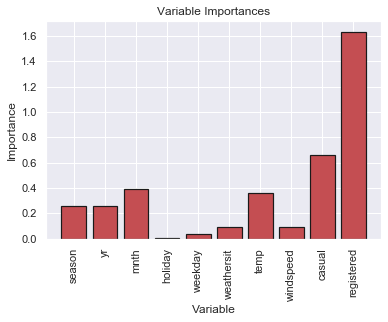

In [87]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one_1, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [89]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now we 
#wil check our model accuracy  by reducing features
train_feature_two = train[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
# build random forest model

Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)

RF_predict_two= Rf_model_two.predict(test_feature_two)

print(RF_predict_two)

[2384.39  4662.002 6481.196 4796.83  3687.922 4070.836 6601.77  2727.808
 6871.698 4649.018 3731.784 7023.508 3377.848 6869.722 7009.134 4964.124
  854.786 5474.188 4563.374 6270.31  3612.384 4894.604 2133.296 5209.67
 1652.084 2426.694 5651.63  4348.806 7137.164 7572.78  4398.912  551.8
 7462.106 1915.324 4706.498 3267.802 1857.47  4104.016 4849.792 4842.934
 3866.19  3901.442 3574.024 2993.558 3285.194 6043.076 1014.272 5599.192
 1624.914 4632.152 4736.666 3222.662 4804.648 3840.824 5377.308 4432.196
 5377.326 1425.316 3811.368 2790.506 5563.744 6854.772 1630.286 3670.702
 7850.906 5300.562 4552.078 5492.588 4648.292 4351.77  1359.162 4212.928
 4572.27  5851.862 6329.08  2012.938 4479.304 1000.16  4734.522 1147.89
 2716.646 4380.936  982.312 4692.97  7392.224 7589.288 2969.176 2304.62
 5951.53  8030.498 7839.946 7376.722 5873.652 6713.356 4686.07  3881.402
 5377.692 7513.178 3577.034 2761.022 4718.622 5626.394 6100.688 4768.912
 7743.37  3537.034 5077.392 3634.72  6763.264 7470.006 4

In [90]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)
#Here it is stating accuracy of the model increases slightly

18.468840508238642

In [92]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_two)
# Accuracy and  RMSE is improved

Mean Square :  15070.226623918374
Root Mean Square :  122.76085134894745


122.76085134894745

In [94]:
#Statsmodels. statsmodels is a Python module that provides classes and functions for the estimation of many 
#different statistical models, as well as for conducting statistical tests, and statistical data exploration. 
#An extensive list of result statistics are available for each estimator.
import statsmodels.api as sm

#develop Linear Regression model using sm.ols
#The Statsmodels package provides different classes for linear regression, including OLS

linear_regression_model = sm.OLS(train_target_feature, train_features_one).fit()

#Summary of model
linear_regression_model.summary()

#predict the  model

predict_LR = linear_regression_model.predict(test_feature)

print(predict_LR)

[2425. 4634. 6241. 4744. 3624. 4035. 6685. 2765. 6824. 4649. 3740. 7001.
 3389. 6825. 7129. 5058.  801. 5515. 4590. 6312. 3663. 4917. 2134. 5204.
 1589. 2376. 5698. 4362. 7058. 7691. 4433.  441. 7446. 1917. 4677. 3214.
 1807. 4128. 4835. 4864. 3855. 3830. 3649. 2935. 3267. 6591.  981. 5566.
 1606. 4679. 4866. 3163. 4785. 3840. 5315. 4458. 5342. 1635. 3777. 2832.
 5582. 6786. 1605. 3641. 8120. 5464. 4563. 5499. 4660. 4191. 1301. 4308.
 4592. 5870. 6370. 2028. 4451.  986. 4725. 1115. 2703. 4381.  959. 4714.
 7363. 7499. 2895. 2496. 5823. 8395. 8167. 7328. 5875. 6824. 4639. 3785.
 5375. 7504. 3574. 3249. 4694. 5634. 5986. 4758. 8362. 3542. 5099. 3620.
 6778. 7410. 4713. 1685. 4066. 4790. 3926. 5557. 5687. 3659. 6852. 4765.
 4511. 2659. 4630. 7697. 6203. 3126. 4845. 1550. 5267. 5217. 3940.   22.
 2417. 2493. 7415. 3190. 2455. 3613. 5495.  795. 4586. 3068. 6133. 7350.
 5976. 6536.  754.]


In [95]:
#evaluate model using MAPE
MAPE(test_target_feature,predict_LR)

#Predict the model using  RMSE
RMSE(test_target_feature,predict_LR)

#it is  showing that  Linear Regression model is  best suitable for the dataset

Mean Square :  9.13121055765183e-24
Root Mean Square :  3.0217892973620497e-12


3.0217892973620497e-12

In [118]:
# COnclusion  Linear regression is the  best model for the dataset